In [1]:
import tensorflow as tf
from keras.models import Model
from keras.layers import Dense, Dropout, Activation, Conv2D, Flatten, MaxPooling2D, Input
import matplotlib.pyplot as plt
from keras.callbacks import TensorBoard
from sklearn.model_selection import train_test_split
import numpy as np
import time
import keras
from keras.models import Sequential

Using TensorFlow backend.


In [ ]:
#X = np.load('features_1000_32.npy')/255
#y = np.load('labels_1000_32.npy')
#X = np.load("aug_features_32x32.npy")/255
#y = np.load("aug_labels_32x32.npy")

#X = np.load('features_std.npy')/255
#y = np.load('labels_std.npy')

#X = np.load('features_png.npy')
#y = np.load('labels_png.npy')


In [2]:
X = np.load('features_std.npy')/255
y = np.load('labels_std.npy')
print(X.shape)
print(y.shape)
X_test = np.load('test_features_.npy')/255
y_test = np.load('test_labels_.npy')
print(X_test.shape)
print(y_test.shape)

(39209, 48, 48, 3)
(39209, 43)
(12630, 48, 48, 3)
(12630, 43)


In [3]:
# concatenate train and test set
print
X = np.concatenate((X,X_test), axis=0)
print(X.shape)
y = np.concatenate((y,y_test), axis=0)
print(y.shape)


(51839, 48, 48, 3)
(51839, 43)


In [4]:
# first split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.23, random_state=22)
X = 0
y = 0

In [5]:
np.save('train_data', X_train)
np.save('train_labels', y_train)
np.save('test_data', X_test)
np.save('test_labels', y_test)

In [ ]:
print(X_test.shape)

In [6]:
# split test set into real test set and small validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.08, random_state=10)

In [16]:
#np.save('train_data', X_train)
#np.save('train_labels', y_train)
np.save('val_data', X_val)
np.save('val_labels', y_val)
#np.save('test_data', X_test)
#np.save('test_labels', y_test)

In [174]:
NAME = "CNN_16_96_128_Dense128_relu_RMSprop_categorical_crossentropy_padding_same"

tensorboard = TensorBoard(log_dir='logs/{}'.format(NAME))

In [175]:
inputs = Input(shape=(X_train.shape[1],X_train.shape[2], 3))

x = Conv2D(32, (3,3), padding="same", activation='relu')(inputs)
x = MaxPooling2D(pool_size=(2,2))(x)
block_1_output = Dropout(0)(x)


x = Conv2D(96, (3,3), padding="same", activation='relu')(block_1_output)
x = MaxPooling2D(pool_size=(2,2))(x)
block_2_output = Dropout(0)(x)

x = Conv2D(128, (3,3), padding="same", activation='relu')(block_2_output)
x = MaxPooling2D(pool_size=(2,2))(x)
block_3_output = Dropout(0)(x)

#x = Conv2D(256, (3,3), padding="same", activation='relu')(block_3_output)
#x = MaxPooling2D(pool_size=(2,2))(x)
#block_4_output = Dropout(0)(x)

x = Flatten()(block_3_output)
x = Dense(128, activation='relu')(x)
prediction = Dense(y_train.shape[1], activation='softmax')(x)
#prediction = Dense(17, activation='softmax')(x)
model_1 = Model(inputs=inputs, outputs=prediction)


In [176]:
model_1.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])

In [177]:
status = model_1.fit(X_train, y_train, batch_size=64, epochs=10, validation_data=(X_val,y_val), callbacks=[tensorboard])


path = 'Optimization Results/'+NAME

model_1.save(path)
results = np.zeros((3,10))
results[0::] = (np.array(status.epoch)+1)
results[1::] = np.array(status.history['val_loss'])
results[2::] = np.array(status.history['val_accuracy'])
np.save(path, results)

Train on 36722 samples, validate on 3194 samples
Epoch 1/10
36722/36722 [==============================] - 8s 212us/step - loss: 1.2811 - accuracy: 0.6361 - val_loss: 0.3384 - val_accuracy: 0.9054
Epoch 2/10
36722/36722 [==============================] - 8s 213us/step - loss: 0.1277 - accuracy: 0.9647 - val_loss: 0.0688 - val_accuracy: 0.9818
Epoch 3/10
36722/36722 [==============================] - 8s 206us/step - loss: 0.0431 - accuracy: 0.9877 - val_loss: 0.0498 - val_accuracy: 0.9875
Epoch 4/10
36722/36722 [==============================] - 8s 207us/step - loss: 0.0233 - accuracy: 0.9934 - val_loss: 0.0417 - val_accuracy: 0.9900
Epoch 5/10
36722/36722 [==============================] - 8s 207us/step - loss: 0.0176 - accuracy: 0.9956 - val_loss: 0.0207 - val_accuracy: 0.9953
Epoch 6/10
36722/36722 [==============================] - 8s 209us/step - loss: 0.0120 - accuracy: 0.9969 - val_loss: 0.0284 - val_accuracy: 0.9941
Epoch 7/10
36722/36722 [==============================] - 8s 20

In [179]:
%load_ext tensorboard


The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [178]:
score = model_1.evaluate(X_test, y_test, verbose = 0) 
print(X_test.shape)
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

(11923, 48, 48, 3)
Test loss: 0.050262905623256596
Test accuracy: 0.9929547905921936


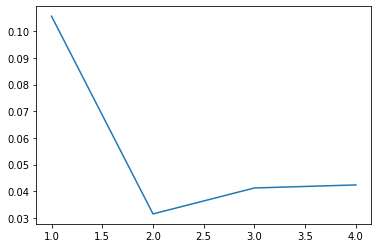

In [19]:
plt.plot((np.array(status.epoch)+1).astype('uint8'), status.history['val_loss'])

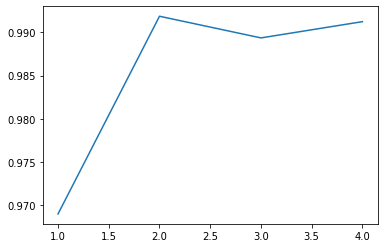

In [18]:
plt.plot(np.array(status.epoch)+1, status.history['val_accuracy'])